### Discovery Significance vs Mass

This notebook makes a p0 plot a scan of the discovery significance vs mass for the H->gg case


We read first the file with the workspace and we retrieve the needed objects

In [1]:
  // Check if example input file exists
  TFile *file = TFile::Open("HiggsModel.root");

  // get the workspace out of the file
  RooWorkspace* w = (RooWorkspace*) file->Get("w");
w->Print();


RooFit v3.60 -- Developed by Wouter Verkerke and David Kirkby 
                Copyright (C) 2000-2013 NIKHEF, University of California & Stanford University
                All rights reserved, please read http://roofit.sourceforge.net/license.txt


RooWorkspace(w) w contents

variables
---------
(a1,a2,mass,nbackground,nsignal,width,x)

p.d.f.s
-------
RooExponential::bmodel[ x=z c=1 ] = 0.000351739
RooAddPdf::model[ nbackground * bmodel + nsignal * smodel ] = 0.000348632
RooGaussian::smodel[ x=x mean=mass sigma=width ] = 1.06342e-12

functions
--------
RooFormulaVar::z[ actualVars=(a1,a2,x) formula="-(x[0]*x[2]/100+x[1]*(x[2]/100)^2)" ] = -7.95262

datasets
--------
RooDataSet::data2(x)

named sets
----------
ModelConfig_NuisParams:(a1,a2,nbackground)
ModelConfig_Observables:(x)
ModelConfig_POI:(nsignal)
nuisParams:(a1,a2,nbackground)

generic objects
---------------
RooStats::ModelConfig::ModelConfig



In [2]:
 // get the data out of the file
  RooAbsData* data2 = w->data("data2");
w->Print();


RooWorkspace(w) w contents

variables
---------
(a1,a2,mass,nbackground,nsignal,width,x)

p.d.f.s
-------
RooExponential::bmodel[ x=z c=1 ] = 0.000351739
RooAddPdf::model[ nbackground * bmodel + nsignal * smodel ] = 0.000348632
RooGaussian::smodel[ x=x mean=mass sigma=width ] = 1.06342e-12

functions
--------
RooFormulaVar::z[ actualVars=(a1,a2,x) formula="-(x[0]*x[2]/100+x[1]*(x[2]/100)^2)" ] = -7.95262

datasets
--------
RooDataSet::data2(x)

named sets
----------
ModelConfig_NuisParams:(a1,a2,nbackground)
ModelConfig_Observables:(x)
ModelConfig_POI:(nsignal)
nuisParams:(a1,a2,nbackground)

generic objects
---------------
RooStats::ModelConfig::ModelConfig



In [3]:
  // get the modelConfig (S+B) out of the file
  // and create the B model from the S+B model
  RooStats::ModelConfig*  sbModel = (RooStats::ModelConfig*) w->obj("ModelConfig");
  sbModel->SetName("S+B Model");      
  RooRealVar* poi = (RooRealVar*) sbModel->GetParametersOfInterest()->first();
  poi->setVal(200);  // set POI snapshot in S+B model for expected significance
  sbModel->SetSnapshot(*poi);
  RooStats::ModelConfig * bModel = (RooStats::ModelConfig*) sbModel->Clone();
  bModel->SetName("B Model");      
  poi->setVal(0);
  bModel->SetSnapshot( *poi  );

In [4]:
vector<double> masses;
vector<double> p0values;
vector<double> p0valuesExpected;
double massMin, massMax; 

###   Loop on the mass values

Perform a loop between the given values and perform an asymptotic hypothesis test to compute the p-value at each scanned mass point

In [15]:
massMin = 112;
massMax = 158;


int npoints = 20;
for( double mass=massMin; mass<=massMax; mass += (massMax-massMin)/double(npoints) )
  {
      
      
     cout << endl << endl << "Running for mass: " << mass << endl << endl;
     w->var("mass")->setVal( mass );

     RooStats::AsymptoticCalculator ac(*data2, *sbModel, *bModel);
     ac.SetOneSidedDiscovery(true);  // for one-side discovery test                                      
     RooStats::AsymptoticCalculator::SetPrintLevel(-1);


     RooStats::HypoTestResult* asymCalcResult = ac.GetHypoTest();
 
     asymCalcResult->Print();
     
     masses.push_back( mass );
     p0values.push_back( asymCalcResult->NullPValue() );
  
     double expectedP0 = RooStats::AsymptoticCalculator::GetExpectedPValues(  asymCalcResult->NullPValue(),  asymCalcResult->AlternatePValue(), 0, false);
     p0valuesExpected.push_back( expectedP0 );
     std::cout << "expected p0 = " << expectedP0 << std::endl;

  }




Running for mass: 112

[#0] PROGRESS:Eval -- AsymptoticCalculator: Building Asimov data Set

Results HypoTestAsymptotic_result: 
 - Null p-value = 0.242479
 - Significance = 0.698349
 - CL_b: 0.242479
 - CL_s+b: 0.859765
 - CL_s: 3.54572
expected p0 = 0.0377336


Running for mass: 114.3

[#0] PROGRESS:Eval -- AsymptoticCalculator: Building Asimov data Set

Results HypoTestAsymptotic_result: 
 - Null p-value = 0.5
 - Significance = -0
 - CL_b: 0.5
 - CL_s+b: 0.972553
 - CL_s: 1.94511
expected p0 = 0.0274472


Running for mass: 116.6

[#0] PROGRESS:Eval -- AsymptoticCalculator: Building Asimov data Set

Results HypoTestAsymptotic_result: 
 - Null p-value = 0.5
 - Significance = -0
 - CL_b: 0.5
 - CL_s+b: 0.988452
 - CL_s: 1.9769
expected p0 = 0.0115484


Running for mass: 118.9

[#0] PROGRESS:Eval -- AsymptoticCalculator: Building Asimov data Set

Results HypoTestAsymptotic_result: 
 - Null p-value = 0.5
 - Significance = -0
 - CL_b: 0.5
 - CL_s+b: 0.99363
 - CL_s: 1.98726
expected p0 

Create a plot with the obtained p-values

In [18]:
  TGraph * graph1  = new TGraph(masses.size(),&masses[0],&p0values[0]);
  TGraph * graph2  = new TGraph(masses.size(),&masses[0],&p0valuesExpected[0]);

  graph1->SetMarkerStyle(20);
  graph1->Draw("APC");
  graph2->SetLineStyle(2);
  graph2->Draw("C");
  graph1->GetXaxis()->SetTitle("mass");
  graph1->GetYaxis()->SetTitle("p0 value");
  graph1->SetTitle("Significance vs Mass");
  graph1->SetMinimum(graph2->GetMinimum());
  graph1->SetLineColor(kBlue);
  graph2->SetLineColor(kRed);
  gPad->SetLogy(true);

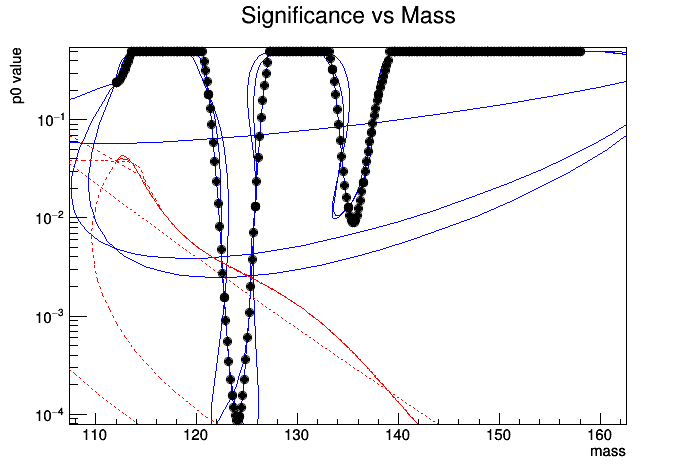

In [19]:
gPad->Draw()